# Исследование оттока клиентов
### Описание данных
**Признаки**
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты (1 - есть, 0 - нет)
- IsActiveMember — активность клиента (1 - активный, 0 - нет)
- EstimatedSalary — предполагаемая зарплата

**Целевой признак**
- Exited — факт ухода клиента

В данном случае необходимо решить задачу классификации клиентов банка. Для этого работу разделим на следующие этапы:
- Анализ данных выявление зависимостей в данных
- Обучение моделей классификации
- Выбор наилучшей модели
- Итоговое тестирование


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

## Изучение данных и исследование зависимостей в них

In [2]:
raw_data = pd.read_csv("Churn.csv")
#raw_data = pd.read_csv("/datasets/Churn.csv")
raw_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
raw_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
raw_data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Признаки `RowNumber` и `СustimerId` являются дополнительными идентификаторами данных, для обучения модели они не информативны, так же в признаке `Surname` наблюдается большое количество уникальных значений. В комбинации с тем что признак является категориальным, он так же будет неинформативным. Принято решение от них избавиться.

In [6]:
raw_data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Пропуски в признаке `Tenure` будем удалять

Рассмотрим распределение целевой переменной `Exited`

In [7]:
def display_pieplot(data: pd.DataFrame, column: str, title: str, labels=None) -> None:
    if labels is None:
        labels = data[column].value_counts().index
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, figsize=(10,10))
    plt.legend(labels, fontsize=10, shadow=True, facecolor='w')
    plt.title(title)
    plt.tight_layout()
    plt.axis('off')

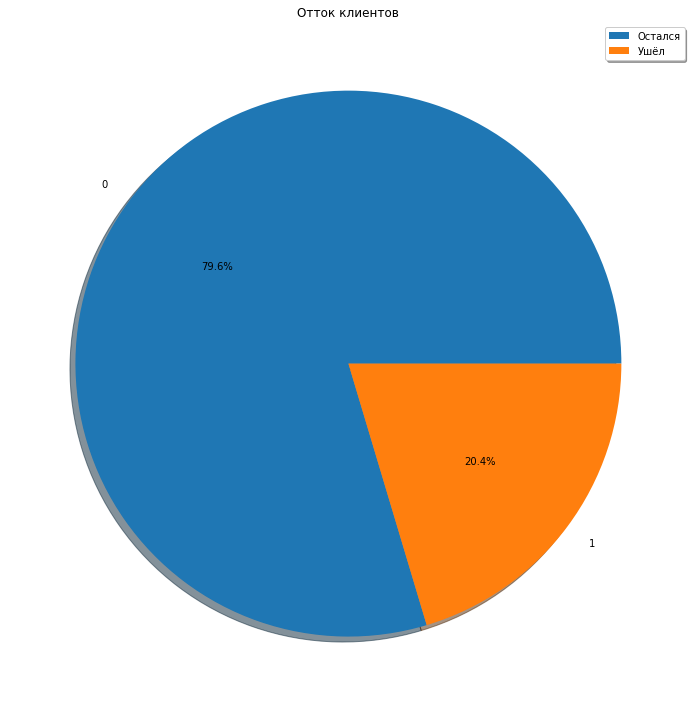

In [8]:
display_pieplot(raw_data, 'Exited', 'Отток клиентов', ["Остался", 'Ушёл'])

В данных наблюдается дисбаланс.

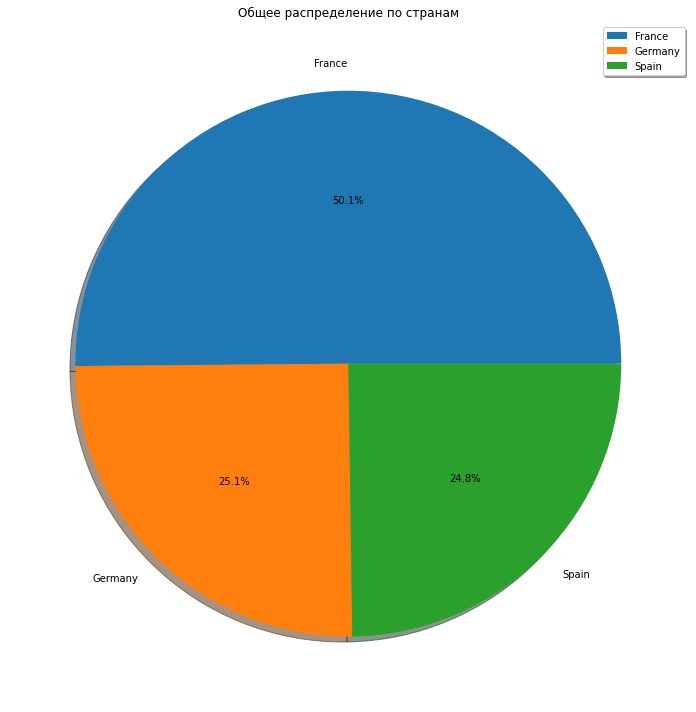

In [9]:
display_pieplot(raw_data, 'Geography', 'Общее распределение по странам')

Половина всех клиентов из Франции.

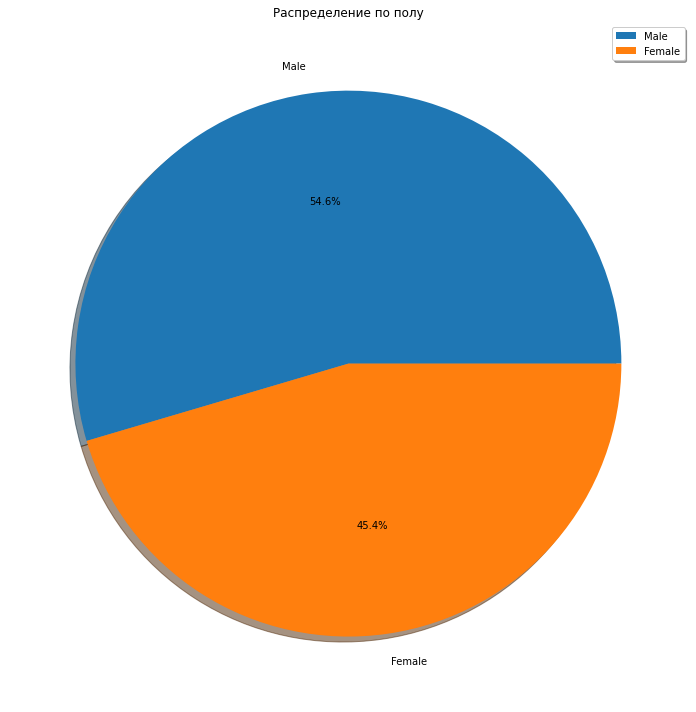

In [10]:
display_pieplot(raw_data, 'Gender', 'Распределение по полу')

Распределение по полу примерно одинаковое

In [11]:
def feature_hist_target_hue(data: pd.DataFrame, cols: list, bins: list) -> None:
    fig, ax = plt.subplots(len(cols), 2, figsize=(25, len(columns)*10))
    for index, column in enumerate(cols):
        sns.histplot(data=data, x=column, hue='Exited', kde=True, bins=bins[index], ax=ax[index][0])
        sns.boxplot(data=data, x='Exited', y=column, ax=ax[index][1])

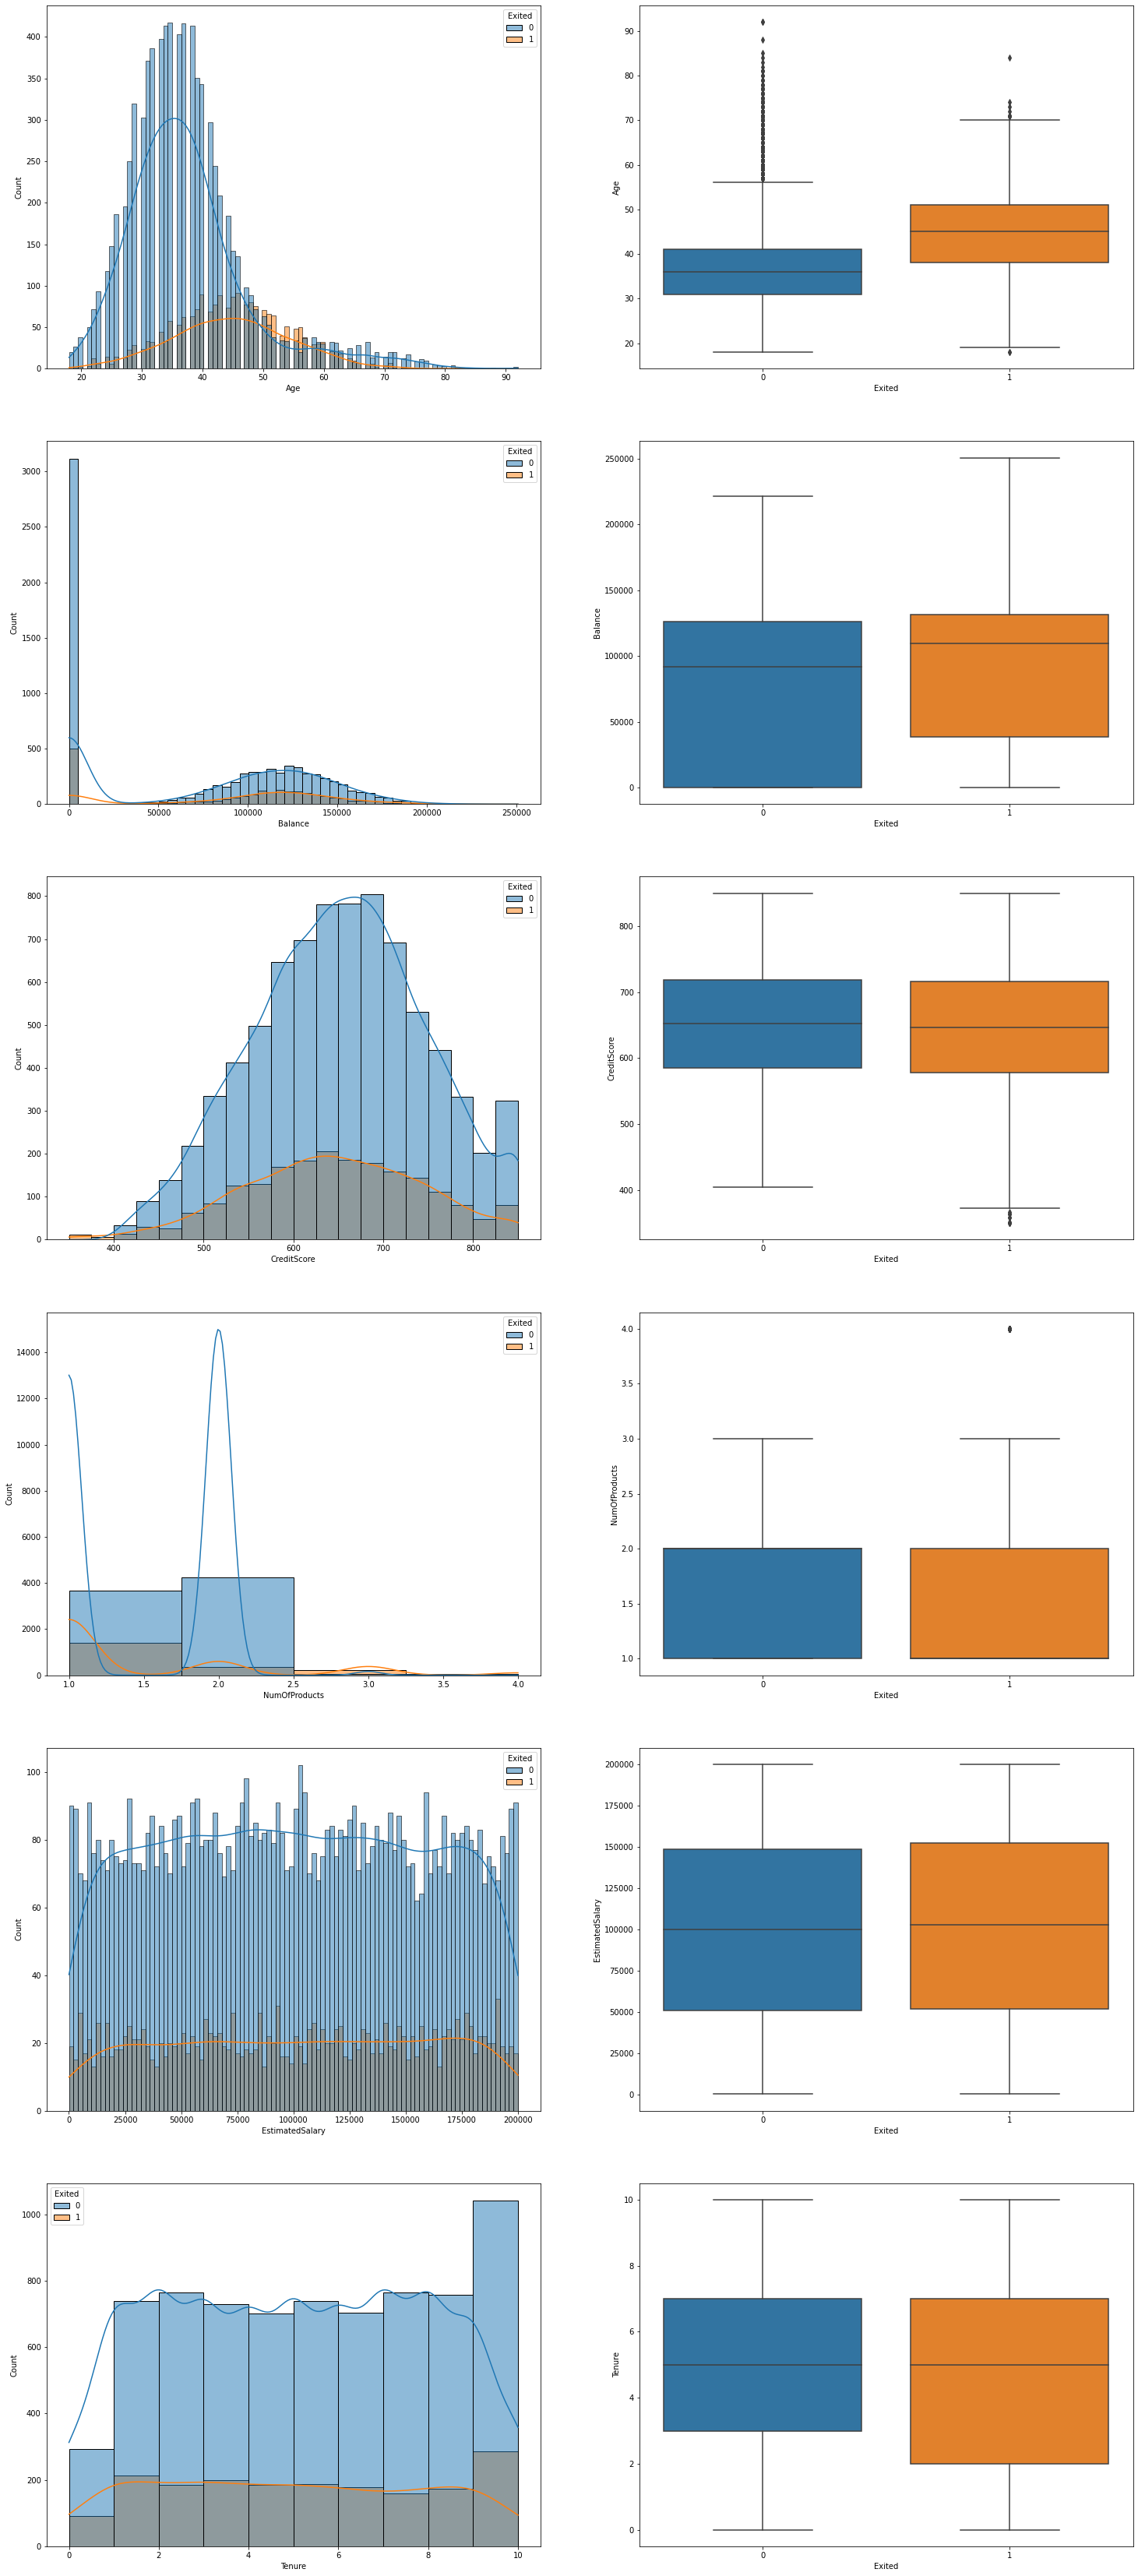

In [12]:
columns = ['Age', 'Balance', 'CreditScore', 'NumOfProducts', 'EstimatedSalary', 'Tenure']
bins = [100, 50, 20, 4, 100, 10]
feature_hist_target_hue(raw_data, columns, bins)

Поведение числовых признаков в зависимости от целевой переменной схожее для всех кроме возраста.
Уходят в среднем более возрастные клиенты. (В данном случае как можно охарактеризовать вывод стастичискими методами рассмотренными ранее в курсе? У меня кроме прямого сравнения медиан идей нет.)

In [13]:
def feature_target_description(data:pd.DataFrame, feature: str, target: str) -> None:
    fig, ax = plt.subplots(data[feature].nunique(), 1, figsize=(8, data[feature].nunique() * 8))
    for  idx, item in enumerate(data[feature].unique()):
        data[data[feature] == item][target].value_counts().plot(kind='pie', autopct='%1.1f%%', title=item, ax=ax[idx])
        plt.tight_layout()
        plt.axis('off')
    plt.show()

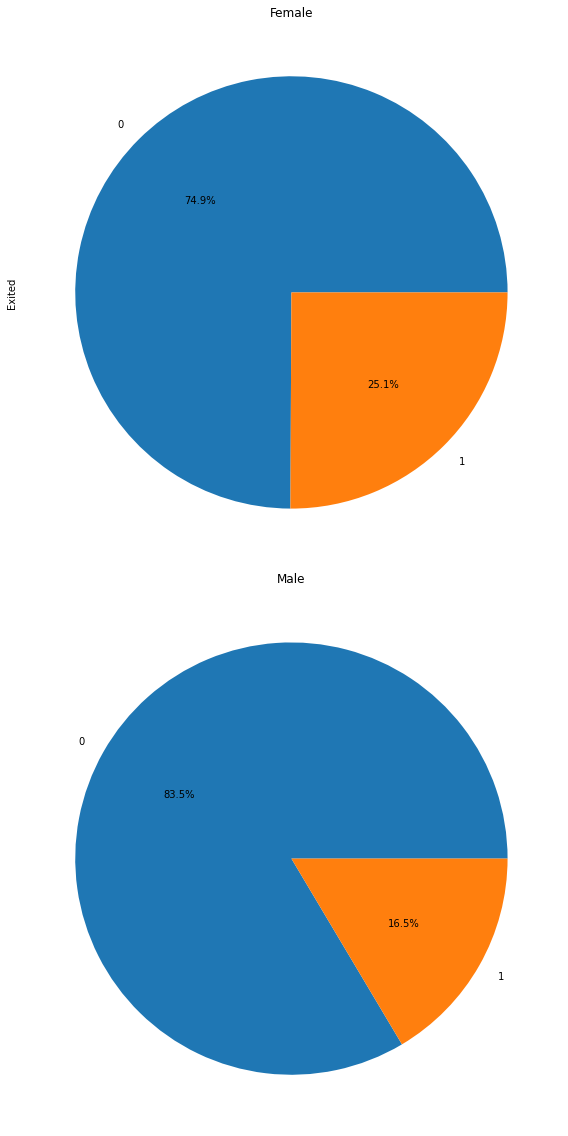

In [14]:
feature_target_description(raw_data, 'Gender', 'Exited')

Женщины чаще отказываются от услуг банка

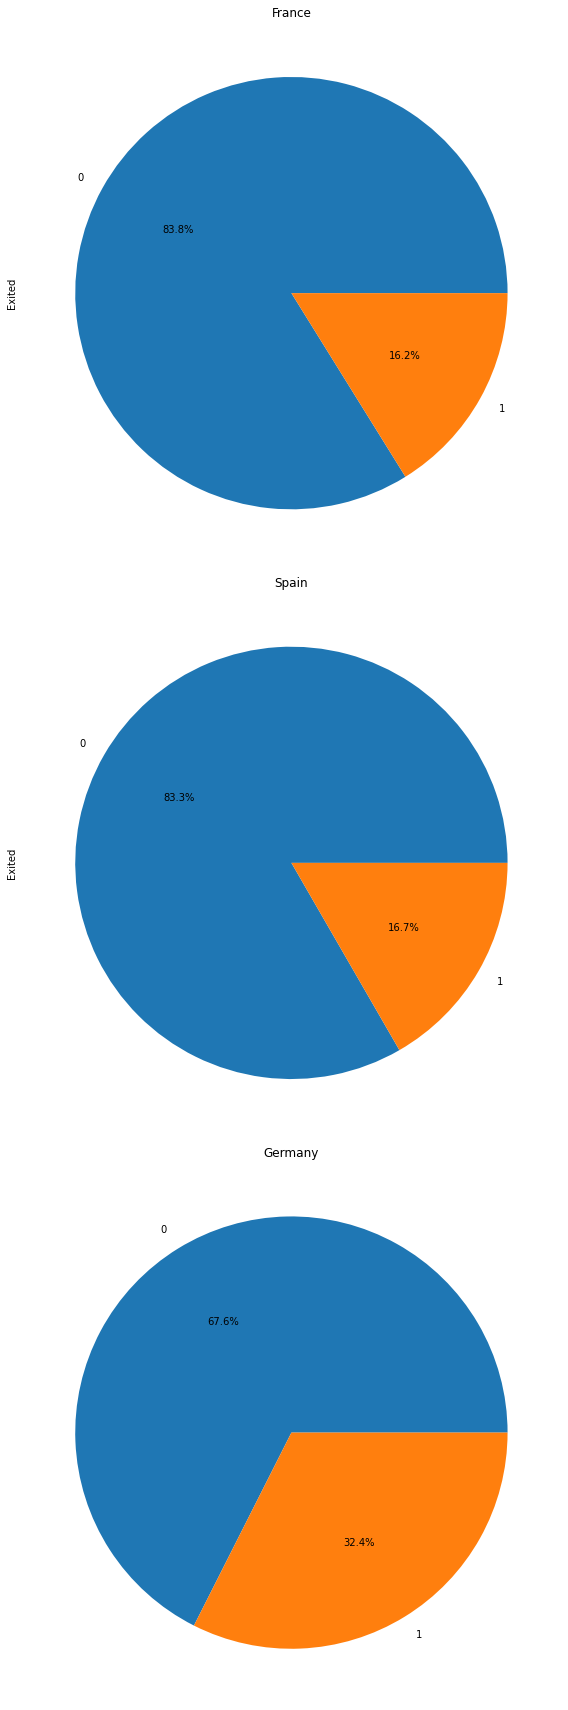

In [15]:
feature_target_description(raw_data, 'Geography', 'Exited')

Наибольший отток наблюдается  в Германии

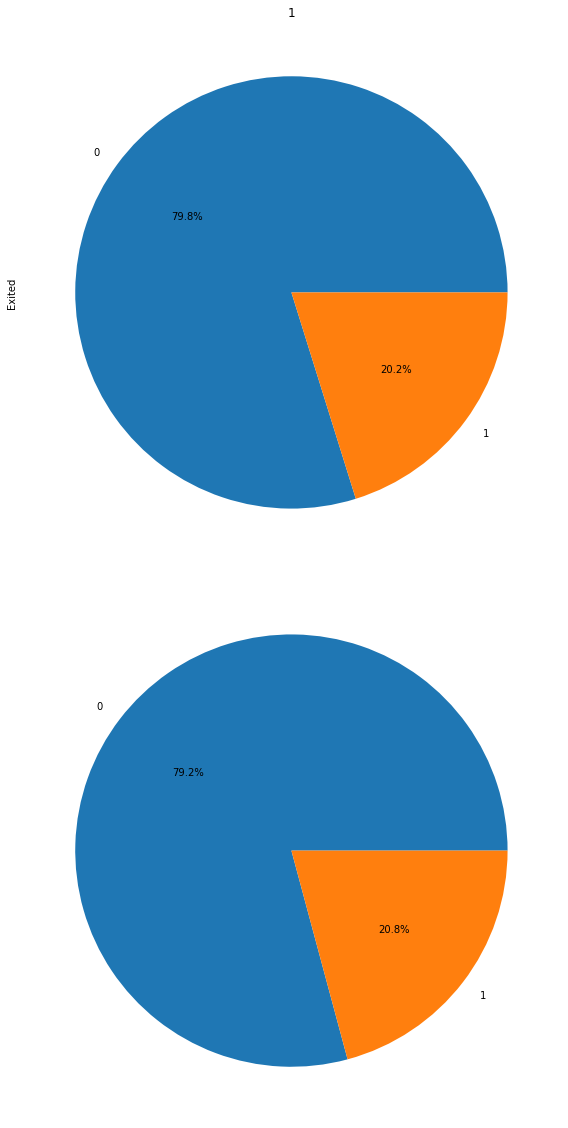

In [16]:
feature_target_description(raw_data, 'HasCrCard', 'Exited')

Наличие кредитной карты не оказывает эффекта

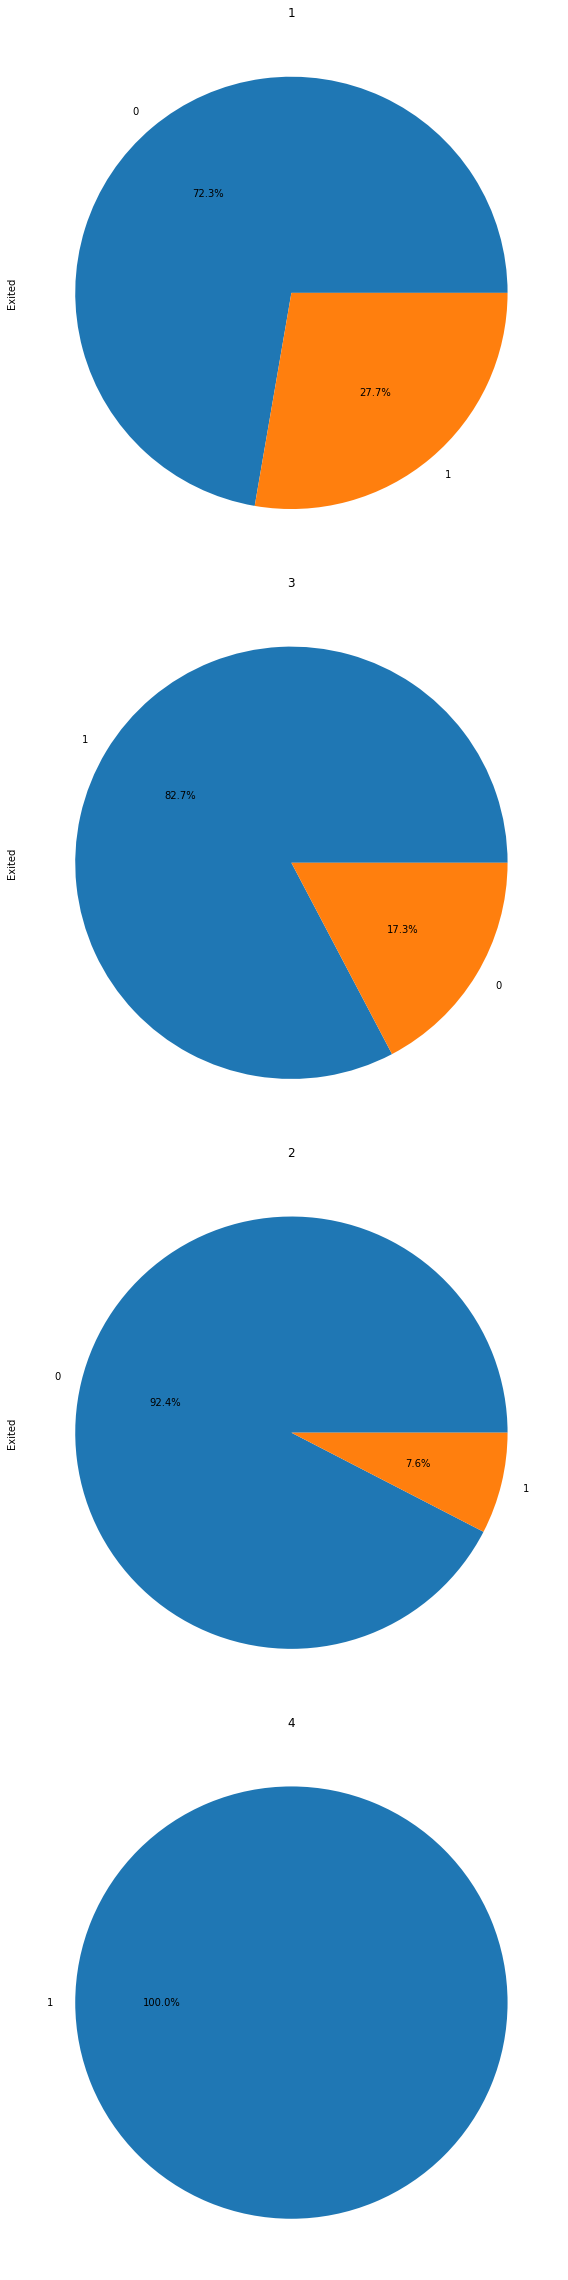

In [17]:
feature_target_description(raw_data, 'NumOfProducts', 'Exited')

Явная корреляция по количеству продуктов, чем больше продуктов имеет клиент, тем ниже вероятность его ухода

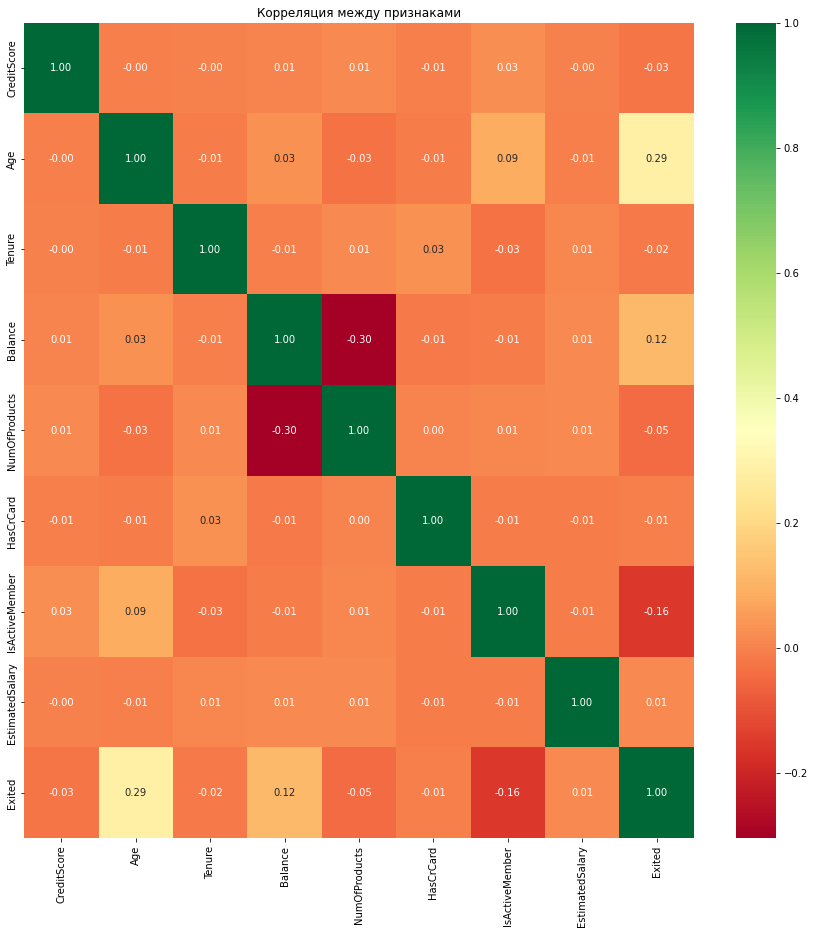

In [18]:
Corr=raw_data.drop(columns=['CustomerId', 'Surname', 'RowNumber']).corr()
plt.figure(figsize=(15, 15))
sns.heatmap(Corr, annot=True, fmt='.2f', cmap='RdYlGn')
plt.title('Корреляция между признаками')
None

В данном случае бинарные признаки можно рассматривать как числовые и к ним корректно применять корреляционный анализ при такой интерпретации.
В корреляционной матрице видны те же зависимости, что были рассмотрены для целевой переменной ранее. Так же присутствует некоторая обратная корреляция между количеством продуктов и балансом клиента.

### Выводы после анализа

Наиболее вероятными кандидатами на уход от банка могут быть следующие лица:

- Клиенты с Германии
- Клиенты женского пола
- Клиенты с низким кредитным рейтингом
- Клиенты с малой активностью
- Люди более зрелого возраста
- Клиенты с малым балансом

## Преобразование данных и обучение моделей

Записи с пропусками решено удалить, так же удали категориальные признаки-идентификаторы, они не содержат в себе полезной информации для предсказания.
Оставшиеся категориальные данные закодируем методом OHE.

In [19]:
transformed_data = raw_data.drop(columns=['CustomerId', 'Surname', 'RowNumber'])
transformed_data.dropna(inplace=True)
transformed_data = pd.get_dummies(transformed_data, drop_first=True)
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9091 non-null   int64  
 1   Age                9091 non-null   int64  
 2   Tenure             9091 non-null   float64
 3   Balance            9091 non-null   float64
 4   NumOfProducts      9091 non-null   int64  
 5   HasCrCard          9091 non-null   int64  
 6   IsActiveMember     9091 non-null   int64  
 7   EstimatedSalary    9091 non-null   float64
 8   Exited             9091 non-null   int64  
 9   Geography_Germany  9091 non-null   uint8  
 10  Geography_Spain    9091 non-null   uint8  
 11  Gender_Male        9091 non-null   uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 736.9 KB


In [20]:
train_data, test_data = train_test_split(transformed_data, test_size=0.2, random_state=42, stratify=transformed_data['Exited'])

разделим выборки на тестовую и тренировочную, валидационную выделять не будем, т.к. далее планируется использовать метод кроссвалидации. Размер тестовой части 20%. Разделение стратифицированное из-за неравномерного распределение примеров в целевой переменной.

In [21]:
pd.concat([transformed_data['Exited'].value_counts(), transformed_data['Exited'].value_counts(normalize=True)], axis=1, keys=['count', 'percentage'])

,count,percentage
0,7237,0.796062
1,1854,0.203938


In [22]:
train_x = train_data.drop(columns=['Exited'])
train_y = train_data['Exited']
test_x = test_data.drop(columns=['Exited'])
test_y = test_data['Exited']

In [23]:
class CustomModel:
    def __init__(self, model):
        self.model = model
        self.scaler = StandardScaler()

    def train(self, features: pd.DataFrame, target: pd.Series, oversampling, params) -> None:
        self.scaler.fit(features)
        transformed = self.scaler.transform(features)
        if oversampling:
            imb_pipeline = Pipeline([('SMOTE',SMOTE(random_state=42)),
                                         ('model', self.model)])
            imb_params = {'model__' + str(key) : params[key] for key in params}
            grid = GridSearchCV(
                estimator=imb_pipeline,
                param_grid=imb_params,
                scoring='f1',
                n_jobs=-1,
                cv=5,
                refit=True
            )
            grid.fit(transformed, target)
            print(f"best score: {grid.best_score_}, best params: {grid.best_params_}")
            self.model = grid.best_estimator_.named_steps['model']
        else:
            grid = GridSearchCV(
                estimator=self.model,
                param_grid=params,
                scoring='f1',
                n_jobs=-1,
                cv=5,
                refit=True
            )
            grid.fit(transformed, target)
            print(f"best score: {grid.best_score_}, best params: {grid.best_params_}")
            self.model = grid.best_estimator_

        self.score(features, target)


    def predict(self, features):
        return self.model.predict(self.scaler.transform(features))


    def predict_proba(self, features):
        return self.model.predict_proba(self.scaler.transform(features))


    def score(self, features: pd.DataFrame, target: pd.Series):
        proba = self.predict_proba(features)
        prediction = self.predict(features)
        print(f"f1_score: {f1_score(target, prediction)}")
        print(f"precision: {precision_score(target, prediction)}")
        print(f"recal : {recall_score(target, prediction)}")
        print(f"ROC-AUC : {roc_auc_score(target, proba[:,1])}")
        precision, recall, threshold = precision_recall_curve(target, proba[:,-1])
        figure, ax = plt.subplots(1,3, figsize=(30, 10))
        ax[0].plot(threshold, precision[:-1], "g--", label="Precision")
        ax[0].plot(threshold, recall[:-1], "r-", label="Recall")
        ax[0].set_xlabel('Threshold')
        ax[0].legend()
        ax[1].plot(recall, precision, "r-", label="precision recall curve")
        ax[1].set_xlabel('Recall')
        ax[1].set_ylabel('Precision')
        fpr, tpr, thresholds = roc_curve(target, proba[:,1], pos_label=1)
        ax[2].plot(fpr, tpr, label='model ROC')
        ax[2].plot([0, 1], [0, 1], linestyle='--', label='random ROC')
        ax[2].set_xlabel('False Positive Rate')
        ax[2].set_ylabel('True Positive Rate')
        ax[2].legend()
        plt.show()


best score: 0.3228346646271789, best params: {}
f1_score: 0.32791728212703103
precision: 0.6076642335766423
recal : 0.22454484153742413
ROC-AUC : 0.7702319149473966


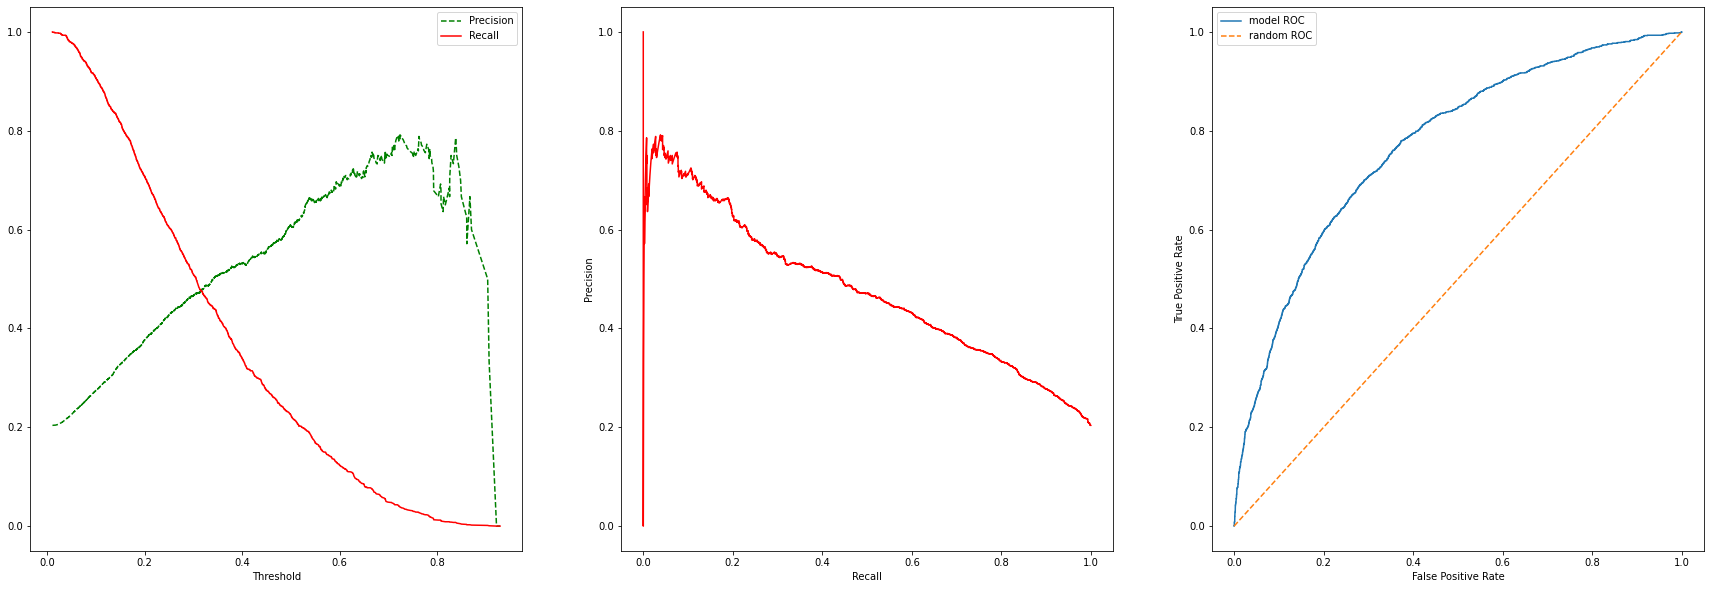

In [24]:
linear = CustomModel(LogisticRegression(random_state=42))
linear.train(train_x, train_y, False, {})

best score: 0.4988334166533015, best params: {}
f1_score: 0.5002433090024331
precision: 0.39132089836315187
recal : 0.6931894807821982
ROC-AUC : 0.773654477817173


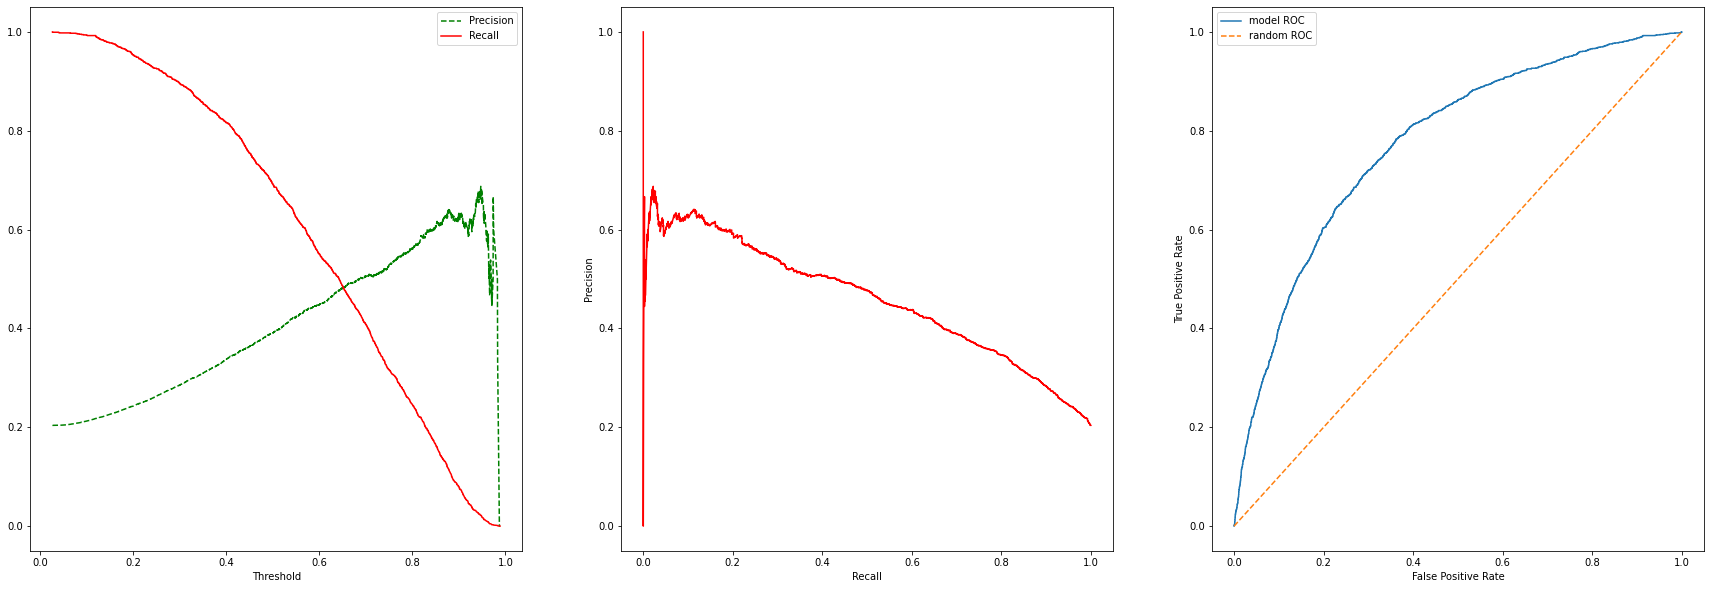

In [25]:
linear.train(train_x, train_y, True, {})

best score: 0.5605072829114639, best params: {'max_depth': 7, 'min_samples_leaf': 3}
f1_score: 0.637328094302554
precision: 0.763653483992467
recal : 0.5468644639244774
ROC-AUC : 0.8850387887740683


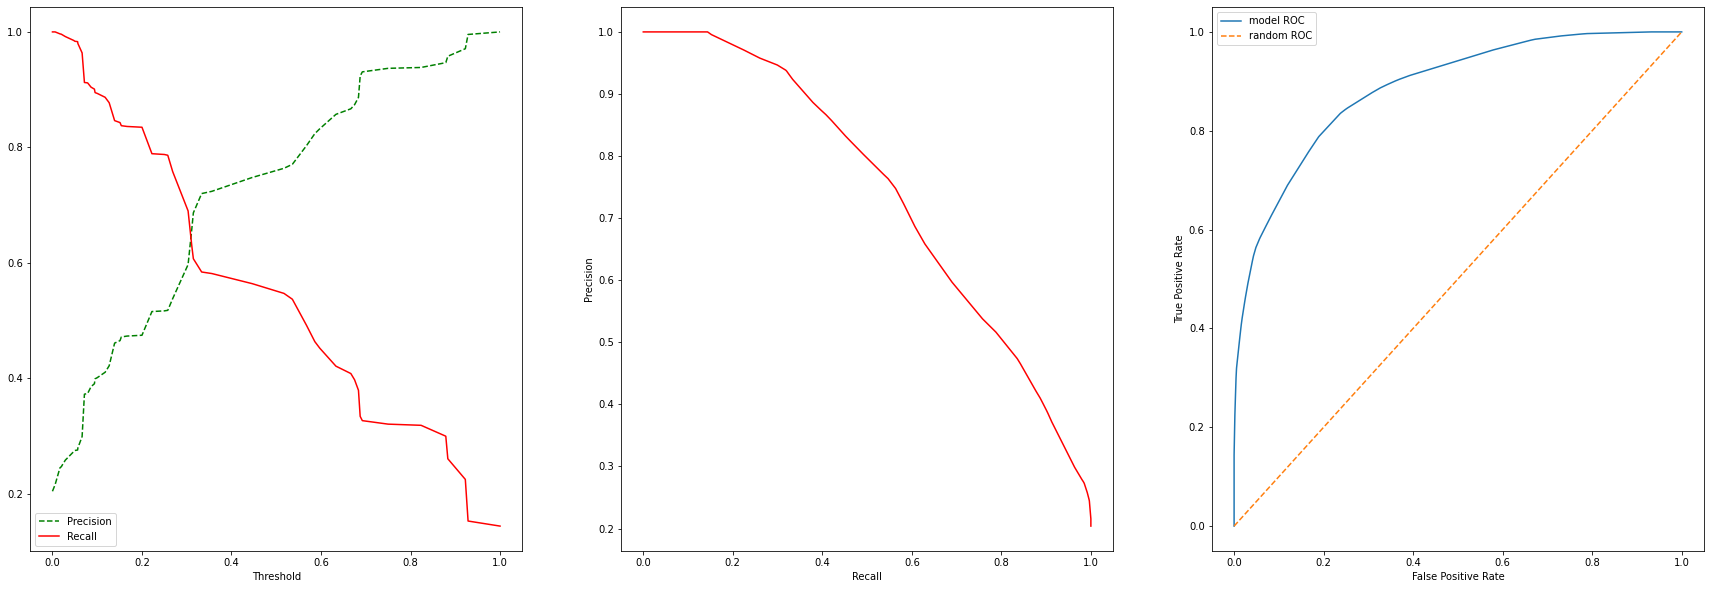

In [26]:
tree = CustomModel(DecisionTreeClassifier(random_state=42))
tree.train(train_x, train_y, False, {
    'max_depth':range(1,50),
    'min_samples_leaf': range(1, 15, 2)
})

best score: 0.5813189136133274, best params: {'model__max_depth': 8, 'model__min_samples_leaf': 13}
f1_score: 0.6350322202694786
precision: 0.5613671672708441
recal : 0.7309507754551584
ROC-AUC : 0.8801925944373075


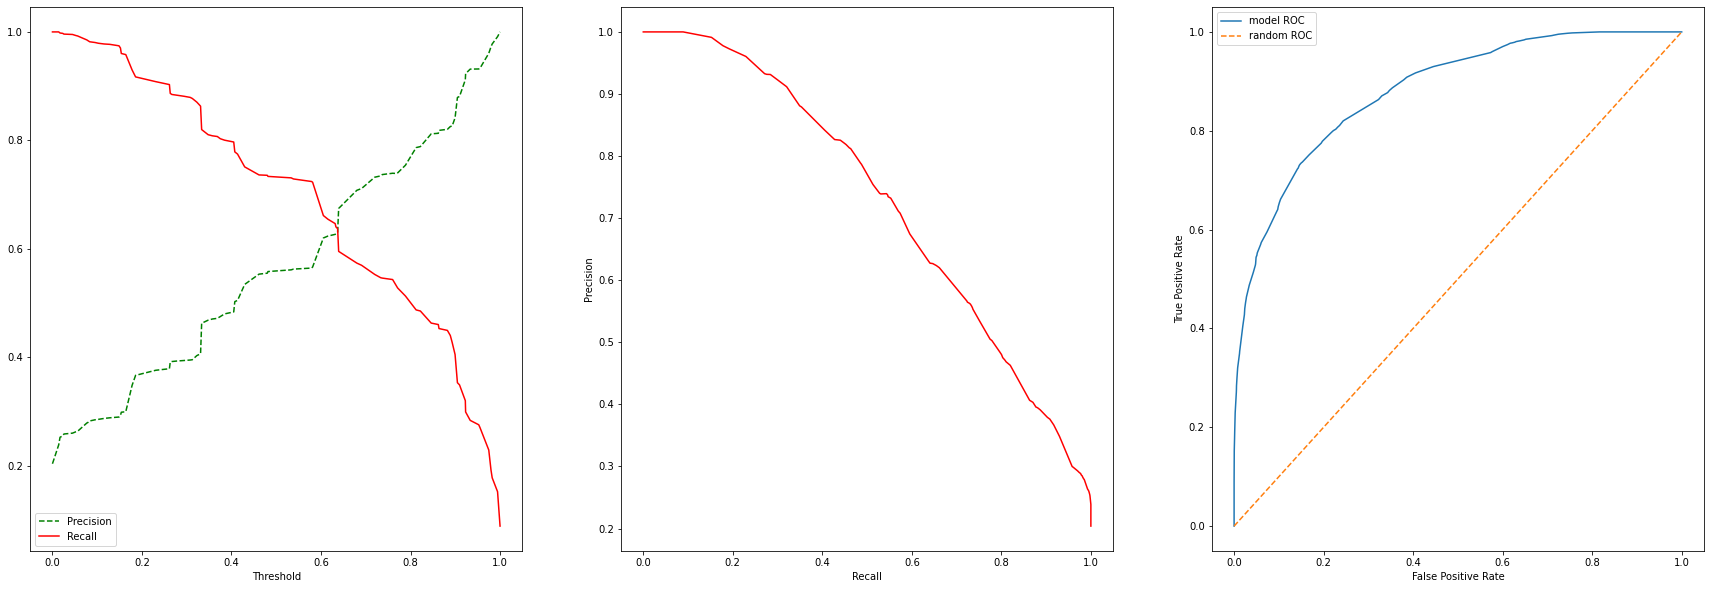

In [27]:
tree.train(train_x, train_y, True, {
    'max_depth':range(1,50),
    'min_samples_leaf': range(1, 15, 2)
})

best score: 0.5847062690383829, best params: {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 210}
f1_score: 0.7825049701789264
precision: 0.9534883720930233
recal : 0.6635198921105866
ROC-AUC : 0.9873112526407711


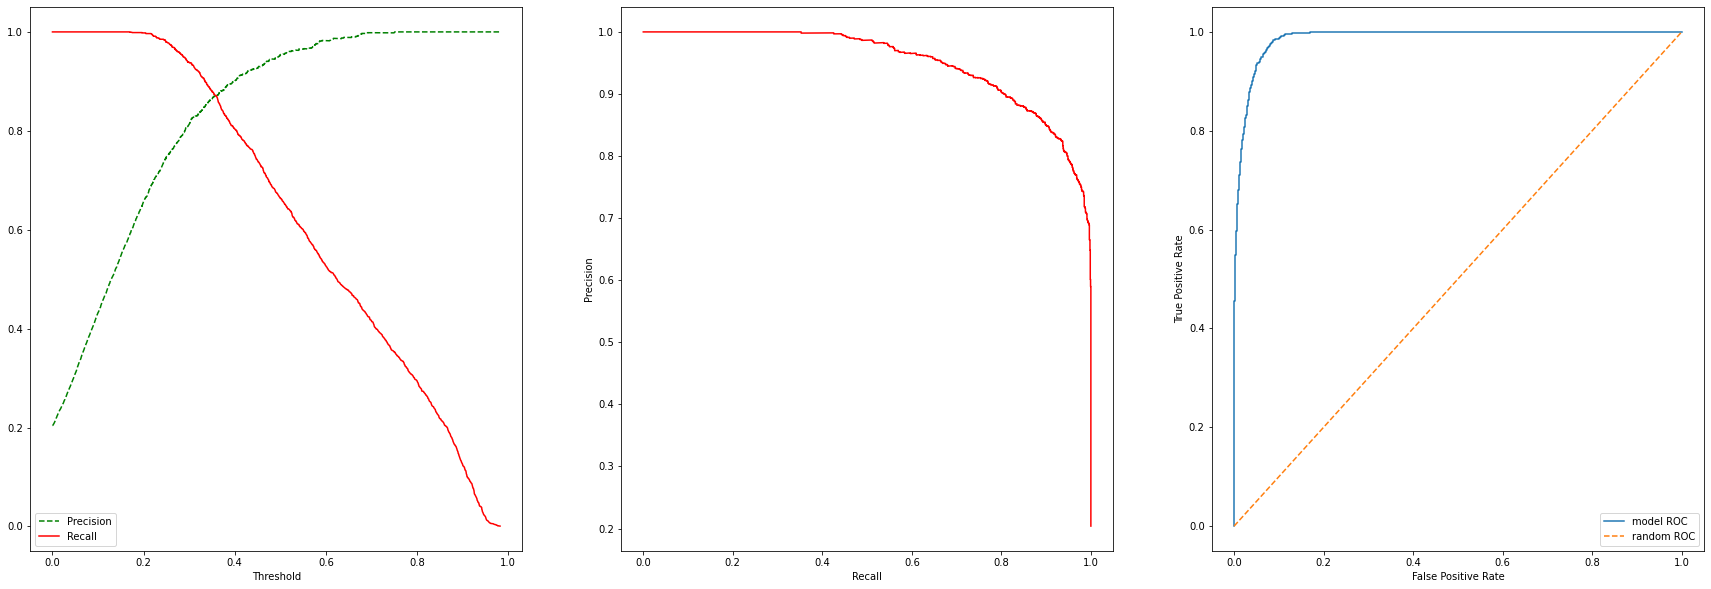

In [28]:
forest = CustomModel(RandomForestClassifier(random_state=42))
forest.train(train_x, train_y, False, {
    'n_estimators':range(10, 220, 20),
    'max_depth':range(2,30, 1),
    'min_samples_split':[2 ,5, 10, 15, 20]
})

best score: 0.616771858668051, best params: {'model__max_depth': 10, 'model__min_samples_split': 20, 'model__n_estimators': 170}
f1_score: 0.703647874585469
precision: 0.6363140676117776
recal : 0.786918408631153
ROC-AUC : 0.9278078370085242


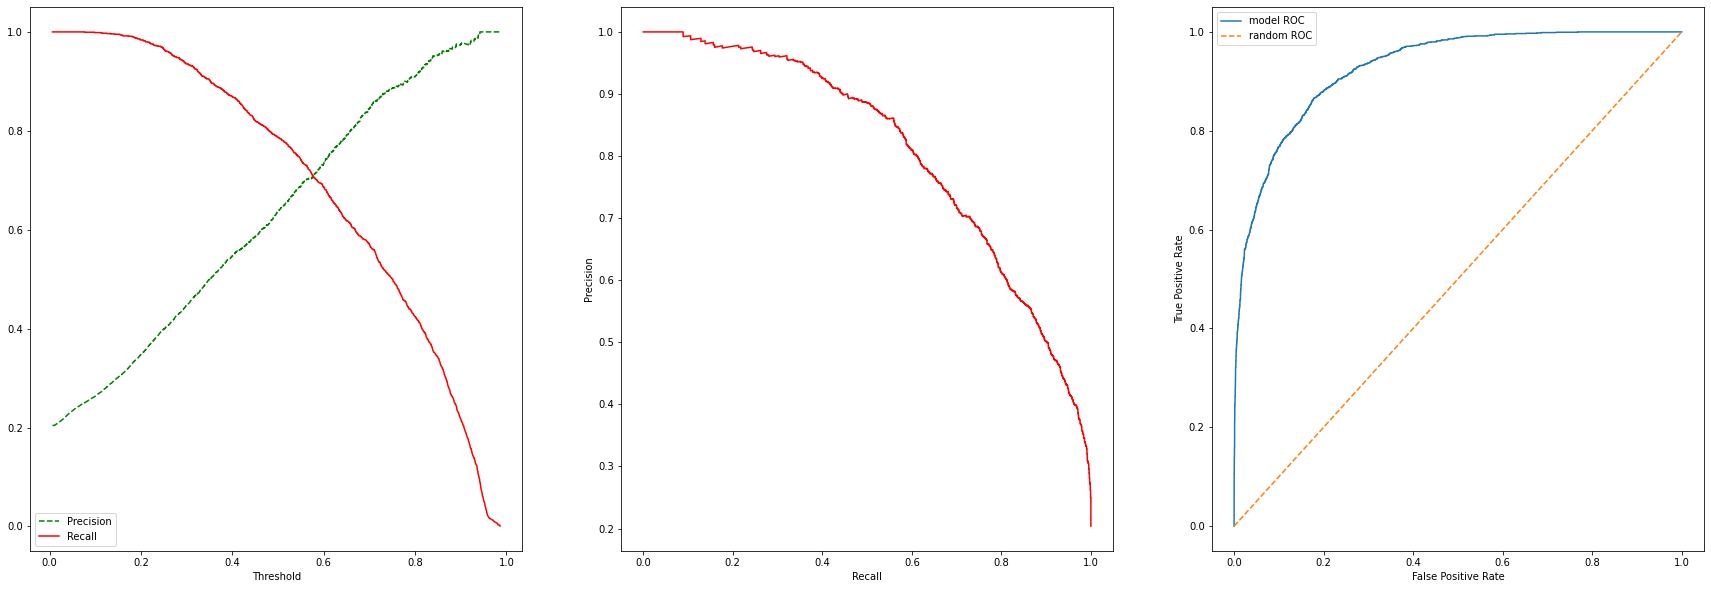

In [29]:
forest = CustomModel(RandomForestClassifier(random_state=42))
forest.train(train_x, train_y, True, {
    'n_estimators':range(10, 230, 20),
    'max_depth':range(2,30, 1),
    'min_samples_split':[2, 5, 10, 15, 20]
})

best score: 0.5725657644975375, best params: {'learning_rate': 1, 'n_estimators': 80}
f1_score: 0.5894822666123115
precision: 0.7453608247422681
recal : 0.4875252865812542
ROC-AUC : 0.8668410116286533


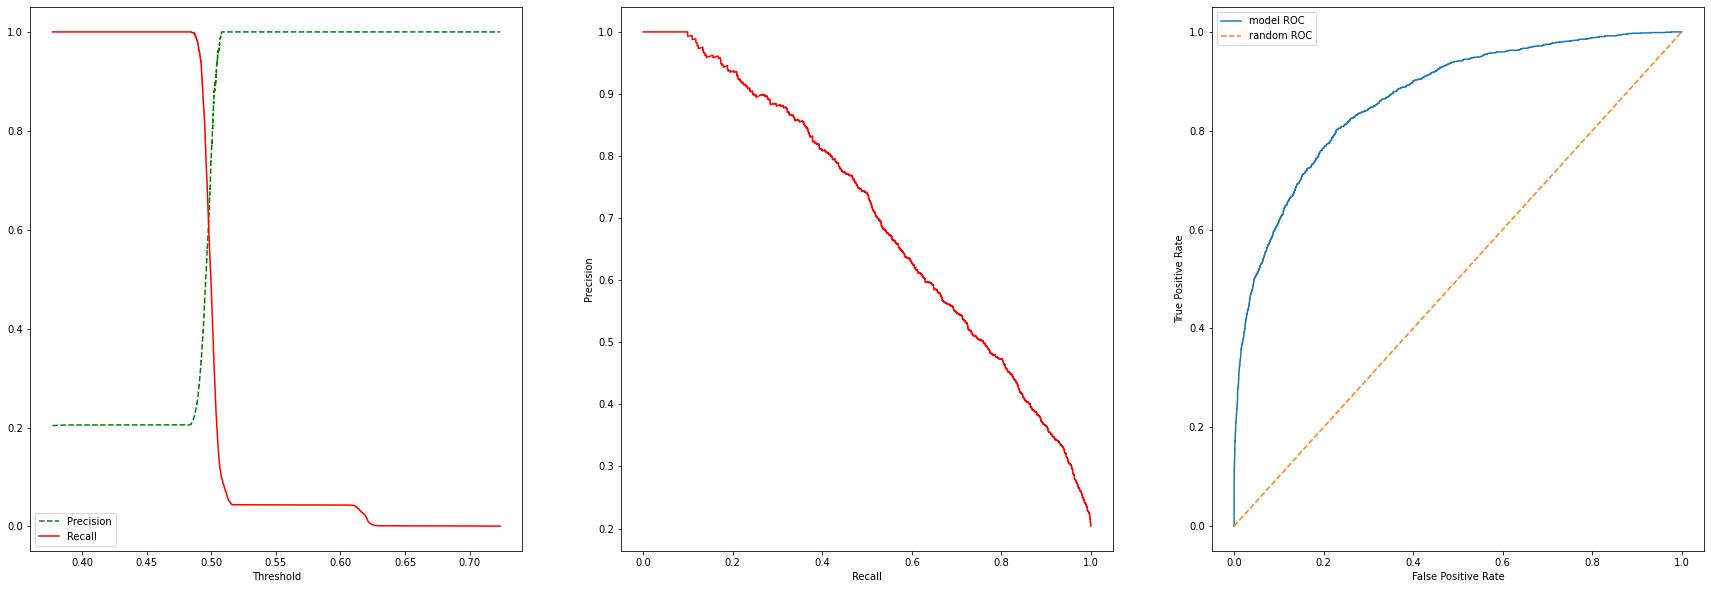

In [30]:
tree_boost = CustomModel(AdaBoostClassifier(random_state=42))
tree_boost.train(train_x, train_y, False, {
    'n_estimators':range(10, 100, 10),
    'learning_rate':[1,3,5,7,10]
})

best score: 0.5795175558578876, best params: {'model__estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_leaf=11, random_state=42), 'model__learning_rate': 3, 'model__n_estimators': 90}
f1_score: 0.6202996890019792
precision: 0.5340798442064265
recal : 0.7397167902899529
ROC-AUC : 0.8704303171301584


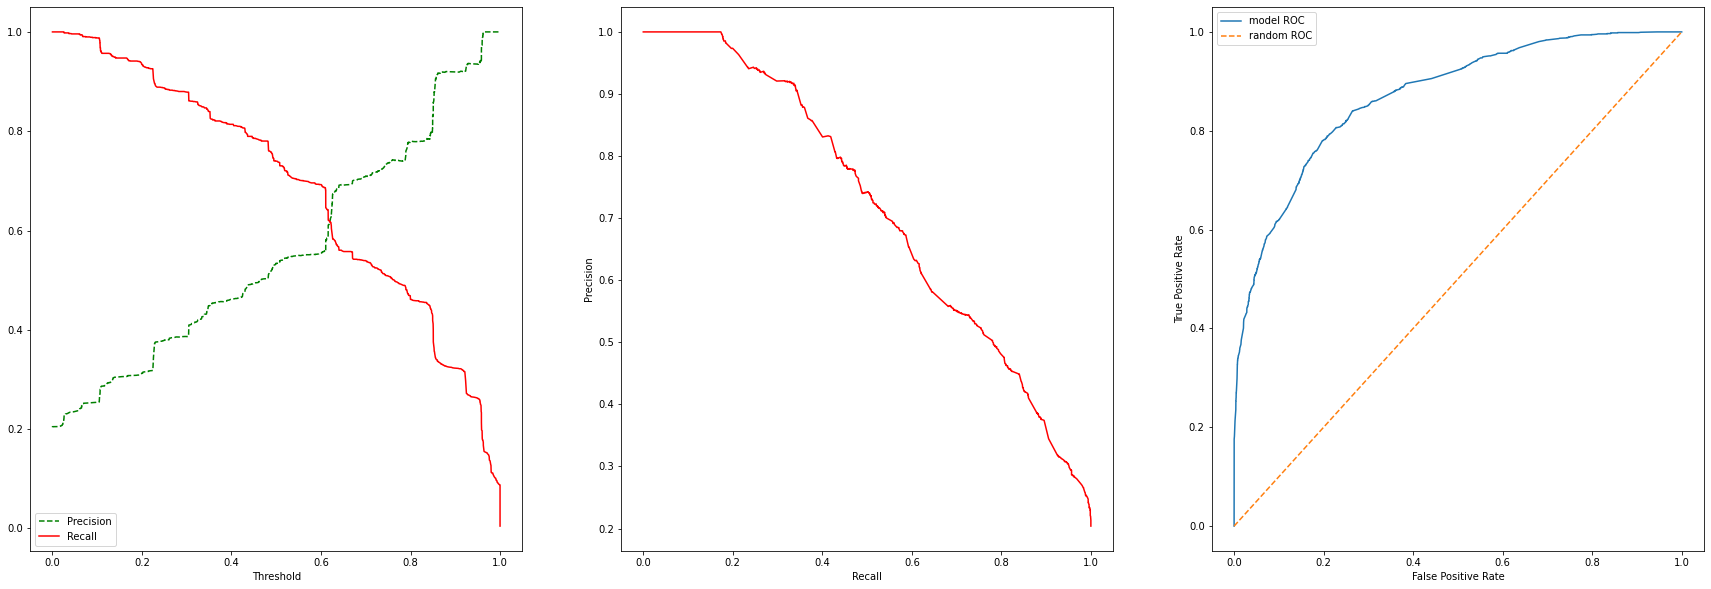

In [31]:
tree_boost.train(train_x, train_y, True, {
    'estimator':[DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=6, min_samples_leaf=11)],
    'n_estimators':range(10, 100, 10),
    'learning_rate':[1, 2, 3, 4, 5, 6]
})

Все алгоритмы показали улучшение показателей балансировке классов методом SMOTE. Выбор модели производить будем только по показателям целевой метрики, на кросс-валидации. Наилучшие результаты демонстрирует случайный лес с балансировкой классов. Для итогового тестирования возьмем будем использовать эту модель

f1_score: 0.6208588957055213
precision: 0.5698198198198198
recal : 0.6819407008086253
ROC-AUC : 0.8532654018555197


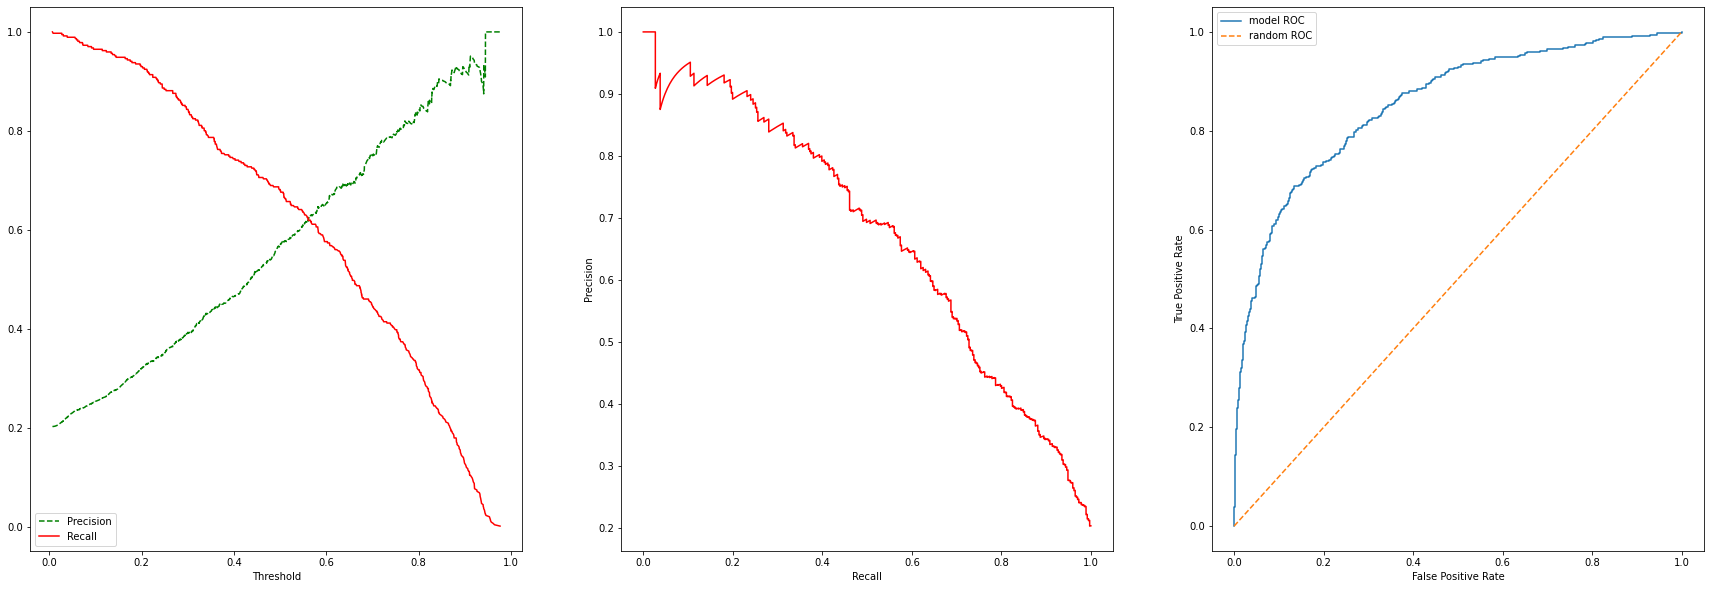

In [32]:
forest.score(test_x, test_y)

целевые значения достигнуты

In [33]:
forest.model.feature_importances_

array([0.03579883, 0.36041091, 0.0448042 , 0.11251052, 0.25670583,
       0.00512546, 0.06218345, 0.04401608, 0.04289109, 0.00641891,
       0.02913472])

Наибольшее влияние на целевую переменную оказывают признаки `Age`, `Balance`, `NumOfProducts`

## Итоговый вывод

- При проведении тестирования моделей балансировку классов проводили с помощью простого добавления экземпляров минормного класса. Данный подход оказался хуже, чем встроенная реализация в алгоритм взвешивания классов. Для дальнейших работ необходимо будет использовать более продвинутые методы по аугментации данных.
- Достигнуть целевых значений по метрике F1 удалось только с помощью алгоритма RandomForest. Подобраны оптимальные параметры обучения. Итоговое значение F1=0.62, целевые значения достигнуты.
- Наибольшее влияние на целевую переменную оказывают признаки `Age`, `Balance`, `NumOfProducts`